In [1]:
TEST = True

In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import os
import time
import random
import pickle

In [4]:
import datetime as datetime

In [5]:
from IPython.display import display
from collections import Counter

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

In [7]:
pd.options.display.max_columns = 500 

In [8]:
train = pd.read_csv('NIJ_s_Recidivism_Challenge_Training_Dataset.csv', index_col = 'ID')
train.head()

,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,Drug,More than 3 years,6,6 or more,1,3,3,4,False,False,3 or more,3,False,2,2 or more,False,False,False,False,False,True,True,False,False,False,False,False,0,6,0,2,612.000000,0.000000,0.0,0.000000,0.0,0.488562,0.447610,False,False,False,False,False
2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,6 or more,3 or more,0,3,5 or more,True,False,3 or more,4 or more,True,0,2 or more,True,True,True,False,False,False,False,False,False,True,False,False,4 or more,0,0,2,35.666667,0.000000,0.0,0.000000,0.0,0.425234,2.000000,False,True,False,False,True
3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,Drug,1-2 years,6,6 or more,3 or more,2,2,5 or more,True,False,3 or more,2,True,1,2 or more,False,True,False,False,False,True,True,False,False,True,False,True,4 or more,6,0,0,93.666667,0.333333,0.0,0.166667,0.0,0.000000,0.000000,False,True,False,True,False
4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,Property,1-2 years,8,6 or more,0,3,3,3,False,False,3 or more,4 or more,False,3 or more,2 or more,False,False,False,False,True,True,True,False,False,False,False,False,0,6,0,3 or more,25.400000,0.000000,0.0,0.000000,0.0,1.000000,0.718996,False,False,False,False,False
5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,1-2 years,4,4,3 or more,2,1,3,True,False,1,0,True,0,1,False,False,False,False,False,True,True,True,False,False,False,False,0,7,0,0,23.117647,0.000000,0.0,0.058824,0.0,0.203562,0.929389,False,True,True,False,False


In [9]:
test = pd.read_csv('NIJ_s_Recidivism_Challenge_Test_Dataset1.csv', index_col = 'ID')
test.head()

,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,M,WHITE,38-42,17,False,5.0,Standard,High School Diploma,0,Property,More than 3 years,4,0,1,3,0,0,False,False,1,0,False,2,0,False,False,False,False,False,False,False,True
8,M,BLACK,38-42,16,False,5.0,High,High School Diploma,3 or more,Drug,Greater than 2 to 3 years,6,6 or more,3 or more,1,2,5 or more,False,False,1,4 or more,True,0,2 or more,True,False,False,False,False,False,True,False
12,M,BLACK,33-37,16,False,5.0,Specialized,High School Diploma,3 or more,Other,1-2 years,10 or more,1,1,1,2,3,False,False,3 or more,1,False,0,2 or more,False,False,False,False,True,True,True,True
15,M,WHITE,33-37,5,False,7.0,Standard,Less than HS diploma,1,Violent/Non-Sex,Greater than 2 to 3 years,9,3,2,2,4,4,False,True,3 or more,2,True,1,1,True,False,False,False,False,True,True,True
16,M,BLACK,33-37,3,False,4.0,Standard,Less than HS diploma,3 or more,NaN,More than 3 years,4,6 or more,0,0,3,4,False,True,2,4 or more,False,0,2 or more,True,False,False,False,False,True,True,False


In [10]:
test.shape

(7807, 32)

In [11]:
x = pd.concat((train[test.columns], test)).sort_index()

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold, ShuffleSplit
from sklearn.metrics import brier_score_loss, mean_squared_error, log_loss, make_scorer

In [13]:
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Ridge, ElasticNet, LogisticRegression, RidgeClassifier, MultiTaskElasticNet
from sklearn.svm import SVR, SVC, LinearSVR, LinearSVC, NuSVC, NuSVR
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [14]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler


In [15]:
import lightgbm as lgb

In [16]:
y = train['Recidivism_Arrest_Year1']

ys = train[['Recidivism_Within_3years', 'Recidivism_Arrest_Year2', 	'Recidivism_Arrest_Year3',
                   'Recidivism_Arrest_Year1']]

extra = train[set(train.columns) - set(test.columns) - set(ys.columns)]


### Stack!

In [17]:
model_names = []
all_preds = []
all_test_preds = []

In [18]:
def boundedMSE(y_true, y_pred):
    residual = ( y_pred * (1 - BOUND) + y_pred.clip(0, 1) * BOUND)  - y_true
    return 2 * residual, 2 * np.ones(len(y_true))

In [19]:
%%time
# file-based dictionary results
for file in sorted([f for f in os.listdir('results/') if '.pkl' in f]):
    model_set = pickle.load(open('results/' + file, 'rb'))
    model_names.append(file)
    print(file)
    all_preds.append( model_set['y_preds'] )
    if TEST: all_test_preds.append( model_set['test_preds'])

M2_LGBR-MTL2-SansRecidivismYear1_5306*50_0.5515.pkl
M2_LGBR-MTL2-SansRecidivismYear1_wOriginalFeatures_5306*50_0.5513.pkl
Main1_LGBR_5306*20_0.1867.pkl
CPU times: user 15.4 s, sys: 325 ms, total: 15.7 s
Wall time: 4.19 s


In [20]:
print(len(all_preds))

3


In [21]:
# %%time
# # FFM directory based files
# for p in sorted([p for p in os.listdir() if 'ffm' in p]):
# # def loadDirectory(p):
#     print(p)
#     preds, tpreds = [], []
#     for f in [f for f in os.listdir( p ) if 'oof' in f and f.endswith('.csv')]:
#         preds.append(pd.read_csv(os.path.join(p, f), index_col = 'ID')['0'])
#     for f in [f for f in os.listdir( p ) if 'test' in f and f.endswith('.csv')]:
#         if TEST: tpreds.append(pd.read_csv(os.path.join(p, f), index_col = 'ID')['0'])

# #     pd.read_csv(os.path.join/' + f, index_col = 'ID').columns
# #     return p, preds, tpreds


#     model_names.append(p)
#     all_preds.append( preds )
#     all_test_preds.append( tpreds )

In [22]:
# model_names

In [23]:
# pd.read_csv('out/tab9_fresh.csv')

In [24]:
%%time
for file in sorted([f for f in os.listdir('out/') if ('layer' in f )
                        and 'stdev' not in f  
                     and 'test' not in f
                    and '_all' not in f
#                     and '640ch' not in f
#                     and '52912' not in f
                   ]):
    test_file = 'out/' + file.replace('.csv', '_test.csv')
    if not os.path.exists(test_file):
        print('no test preds for {}; skipping'.format(file)); continue;
    else:
        print(file)
    preds = pd.read_csv('out/' + file, index_col = 0)
    model_names.append(file)
    all_preds.append( [preds.iloc[:, 0]])
    if TEST: all_test_preds.append( pd.read_csv(test_file, index_col = 0) )

NN_xe_2layer_384ch_f5295*80_mean40_0.08.csv
NN_xe_2layer_384ch_f5295*80_mean40_0.15.csv
NN_xe_2layer_384ch_f5295*80_mean60_0.08.csv
NN_xe_2layer_384ch_f5295*80_mean60_0.15.csv
NN_xe_2layer_640ch_f5295*80_mean40_0.08.csv
NN_xe_2layer_640ch_f5295*80_mean40_0.15.csv
NN_xe_2layer_640ch_f5295*80_mean60_0.08.csv
NN_xe_2layer_640ch_f5295*80_mean60_0.15.csv
CPU times: user 1.76 s, sys: 416 ms, total: 2.18 s
Wall time: 2.49 s


In [25]:
# knn_df = pd.read_csv('knn.csv', index_col = 'ID')
# for col in [c for c in knn_df.columns if 'any' not in c]:
#     model_names.append(col)
#     all_preds.append(knn_df[col].reindex(train.index))
#     if TEST: all_test_preds.append(knn_df[col].reindex(test.index))


In [26]:
from sklearn.linear_model import LinearRegression


In [27]:
if TEST: assert len(all_preds) == len(all_test_preds)

In [28]:
len(all_preds)

11

In [29]:
ap = {}; atp = {}
for idx, preds in enumerate(all_preds):
    name = model_names[idx]
    if isinstance(preds, list):
        preds = pd.concat(preds)
    ap[name] = preds.groupby(preds.index).mean()
    
    if TEST:
        test_preds = all_test_preds[idx]
        if isinstance(test_preds, list):
            test_preds = pd.concat(test_preds)
#         print(test_preds.shape)
#         print(len(test_preds.shape))
        if len( tps := test_preds.shape) > 1 and tps[1] == 1:
            test_preds = test_preds.iloc[:, 0]
        elif len(tps) == 1: pass;
        else:
            print('*** TEST PREDS DIM MISMATCH FOR {}'.format(name))
        atp[name] = test_preds.groupby(test_preds.index).mean()
            

In [30]:
stack_df = pd.DataFrame(ap)

In [31]:
stack_test_df = pd.DataFrame(atp)

In [32]:
stack_df.shape

(18028, 11)

In [33]:
if TEST: print(stack_test_df.shape)

(7807, 11)


In [34]:
stack_df = stack_df[sorted(stack_df.columns)]

In [35]:
stack_test_df = stack_test_df[sorted(stack_test_df.columns)]

In [36]:
assert stack_df.isnull().sum().sort_values().sum() == 0

In [37]:
stack_df = stack_df.dropna(axis = 1)

In [38]:
stack_df.columns[::10]

Index(['M2_LGBR-MTL2-SansRecidivismYear1_5306*50_0.5515.pkl', 'NN_xe_2layer_640ch_f5295*80_mean60_0.15.csv'], dtype='object')

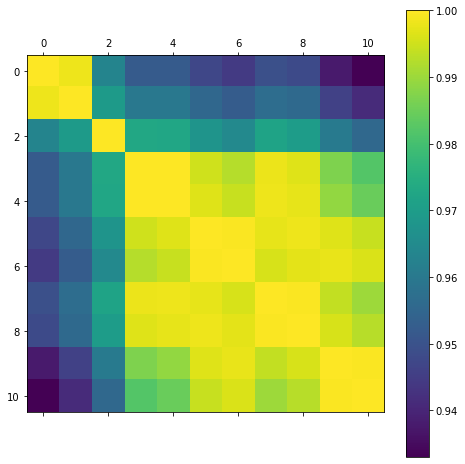

In [39]:
plt.matshow(np.corrcoef(stack_df.T))
plt.colorbar()

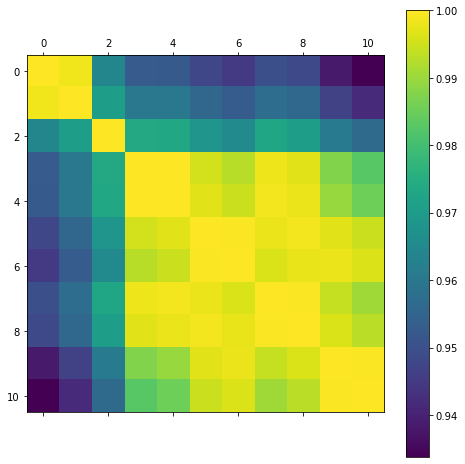

In [40]:
plt.matshow(np.corrcoef(stack_test_df.T))
plt.colorbar()

In [41]:
stack_df.columns[::10]

Index(['M2_LGBR-MTL2-SansRecidivismYear1_5306*50_0.5515.pkl', 'NN_xe_2layer_640ch_f5295*80_mean60_0.15.csv'], dtype='object')

In [42]:
from sklearn.linear_model import LinearRegression, RidgeCV, ElasticNetCV

In [43]:
sorted(list(stack_df.columns))[::10]

['M2_LGBR-MTL2-SansRecidivismYear1_5306*50_0.5515.pkl',
 'NN_xe_2layer_640ch_f5295*80_mean60_0.15.csv']

In [44]:
drop_models = []

In [45]:
drop_cols =[c for c in stack_df.columns if any([z in c for z in drop_models])]
print(drop_cols)

[]


In [46]:
enet_params = {
    'alpha': [  3e-5, 1e-4, 3e-4, 1e-3, 3e-3, ],
    'l1_ratio': [ 1e-3, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5,  ]    
}

In [47]:
feature_drop = 0.0

In [48]:
%%time
all_y_preds = []; all_y_test_preds = []; coefs = []
for r in range(30):
    sfolds = StratifiedKFold(n_splits = random.randrange(5, 7), shuffle = True,
                                random_state = datetime.datetime.now().microsecond )\
                                            .split(np.zeros(len(y)), y)
    y_preds, y_test_preds = [], []
    for fold in sfolds:
        y_train = y.iloc[fold[0]]
        y_holdout = y.iloc[fold[1]]
        y_test = y.reindex(stack_test_df.index)
        
        clf = RandomizedSearchCV( ElasticNet(selection = 'cyclic', positive = True,  precompute = True,
                                             tol = 3e-5, max_iter = 5000), 
                          enet_params, n_iter = 3, n_jobs = -1,
                  cv = StratifiedKFold(n_splits = random.randrange(4, 7), 
                                              shuffle = True, 
                                    random_state = datetime.datetime.now().microsecond  ))
        sdf = stack_df.drop(columns = drop_cols).copy()
        stdf = stack_test_df.drop(columns = drop_cols).copy()
        
        for col in random.sample( list(sdf.columns), 
                            k = int(len(sdf.columns) * feature_drop * 
                                        random.random() ** 0.5 ) ):
            sdf[col] = 0; stdf[col] = 0

        clf.fit(sdf.reindex(y_train.index),  y_train)
        if random.random() < 1/10: print(clf.best_params_)
        coefs.append(clf.best_estimator_.coef_)
        all_y_preds.append( 
            pd.Series( clf.predict(sdf.reindex(y_holdout.index)), index = y_holdout.index) )
        all_y_test_preds.append( 
            pd.Series( clf.predict(stdf.reindex(y_test.index)), index = y_test.index) )
        


{'l1_ratio': 0.3, 'alpha': 0.0001}
{'l1_ratio': 0.001, 'alpha': 0.0003}
{'l1_ratio': 0.2, 'alpha': 3e-05}
{'l1_ratio': 0.001, 'alpha': 0.0001}
{'l1_ratio': 0.2, 'alpha': 3e-05}
{'l1_ratio': 0.1, 'alpha': 0.0003}
{'l1_ratio': 0.05, 'alpha': 0.0001}
{'l1_ratio': 0.01, 'alpha': 0.001}
{'l1_ratio': 0.01, 'alpha': 0.0001}
{'l1_ratio': 0.05, 'alpha': 3e-05}
{'l1_ratio': 0.2, 'alpha': 0.0003}
CPU times: user 30.9 s, sys: 25.7 s, total: 56.6 s
Wall time: 40.9 s


In [49]:
final_preds = (ayp := pd.concat(all_y_preds) 
                      ).groupby(ayp.index).mean().reindex(y.index) 
final_test_preds = (aytp := pd.concat(all_y_test_preds) 
                       ).groupby(aytp.index).mean().reindex(stack_test_df.index) 


In [50]:
round( mean_squared_error( y, final_preds), 5)

0.18592

In [51]:
# 0.18674 single-LGB
# 0.18615 single-LGB and second-layer
# 0.18596   + one NN
# 0.18592    + another NN

In [52]:
final_preds.shape

(18028,)

In [53]:
final_test_preds.shape

(7807,)

In [54]:
print('Means: {:.4f} {:.4f}'.format( np.mean(final_preds), np.mean(final_test_preds) ) )
print('Stdev: {:.4f} {:.4f}'.format( np.std(final_preds), np.std(final_test_preds) ) )

Means: 0.2983 0.2985
Stdev: 0.1528 0.1515


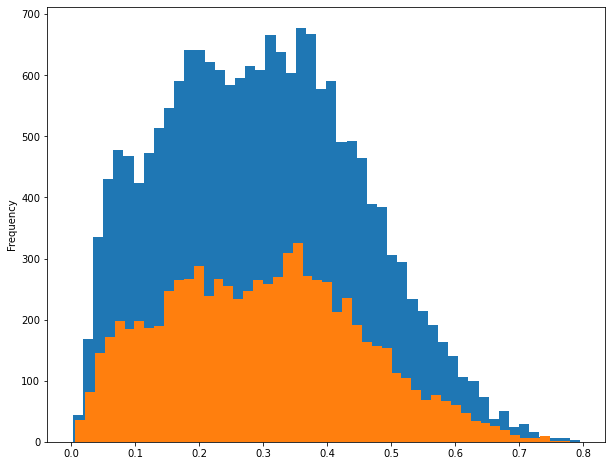

In [55]:
final_preds.plot(kind = 'hist', bins = 50)
final_test_preds.plot(kind = 'hist', bins = 50)

In [56]:
final_test_preds.to_csv('PREDS.csv')

In [57]:
final_test_preds

6        0.088677
8        0.186642
12       0.232930
15       0.235104
16       0.131527
           ...   
26746    0.091500
26747    0.108744
26749    0.161365
26752    0.133650
26755    0.113347
Length: 7807, dtype: float64

In [58]:
tc = {}
for col in stack_test_df.columns:
    tc[col] = final_test_preds.corr(stack_test_df[col])

In [59]:
print('Model Correlations:')
pd.Series(tc).sort_values()[::-1]

Model Correlations:


M2_LGBR-MTL2-SansRecidivismYear1_wOriginalFeatures_5306*50_0.5513.pkl    0.990278
M2_LGBR-MTL2-SansRecidivismYear1_5306*50_0.5515.pkl                      0.986866
NN_xe_2layer_640ch_f5295*80_mean40_0.08.csv                              0.985405
NN_xe_2layer_640ch_f5295*80_mean40_0.15.csv                              0.985400
NN_xe_2layer_384ch_f5295*80_mean60_0.08.csv                              0.985254
NN_xe_2layer_384ch_f5295*80_mean40_0.15.csv                              0.985014
NN_xe_2layer_384ch_f5295*80_mean40_0.08.csv                              0.984218
NN_xe_2layer_384ch_f5295*80_mean60_0.15.csv                              0.984082
Main1_LGBR_5306*20_0.1867.pkl                                            0.982911
NN_xe_2layer_640ch_f5295*80_mean60_0.08.csv                              0.981234
NN_xe_2layer_640ch_f5295*80_mean60_0.15.csv                              0.978256
dtype: float64

In [60]:
print('Model Weights:')
( wt_df := pd.Series(np.mean(coefs, axis = 0), sdf.columns)  ).sort_values()[::-1].round(3)[:50]

Model Weights:


M2_LGBR-MTL2-SansRecidivismYear1_5306*50_0.5515.pkl                      0.429
NN_xe_2layer_640ch_f5295*80_mean60_0.15.csv                              0.258
Main1_LGBR_5306*20_0.1867.pkl                                            0.134
M2_LGBR-MTL2-SansRecidivismYear1_wOriginalFeatures_5306*50_0.5513.pkl    0.092
NN_xe_2layer_640ch_f5295*80_mean60_0.08.csv                              0.090
NN_xe_2layer_640ch_f5295*80_mean40_0.15.csv                              0.012
NN_xe_2layer_384ch_f5295*80_mean60_0.15.csv                              0.008
NN_xe_2layer_640ch_f5295*80_mean40_0.08.csv                              0.005
NN_xe_2layer_384ch_f5295*80_mean60_0.08.csv                              0.003
NN_xe_2layer_384ch_f5295*80_mean40_0.15.csv                              0.000
NN_xe_2layer_384ch_f5295*80_mean40_0.08.csv                              0.000
dtype: float64